In [2]:
#Do sanity checks
#Retrain agents with different seeds

import rlcard
from rlcard import models
from rlcard.agents import NFSPAgent, RandomAgent
from rlcard.utils import (
    get_device,
    set_seed,
    tournament,
    reorganize,
    Logger,
    plot_curve,
)
import numpy as np

In [3]:
import torch

In [4]:
# !python run_rl_multiagent.py

In [41]:
from rlcard.models.limitholdem_rule_models import LimitholdemRuleAgentV1

eval_env = rlcard.make(
    'limit-holdem-collaborative',
    config={
        'game_num_players': 2,
    }
)

agent1 = torch.load(r'./checkpoint_collab/10000_comp_brain1.pth')
# agent2 = torch.load(r'./checkpoint_collab/comp_brain1.pth')
# agent2 = torch.load(r'.\checkpoint_collab\collab_nfsp_friend2.pth')
# agent3 = torch.load(r'.\checkpoint_collab\collab_nfsp_comp3.pth')

In [42]:
eval_env.set_agents([
  agent1,
  # agent2,
  LimitholdemRuleAgentV1()
])

In [48]:
win_ratio = []

for _ in range(100):
  
    a = [0 for _ in range(eval_env.num_players)]
    win_num = [0 for _ in range(eval_env.num_players)]
    for i in range(1000):
        eval_env.reset()
        trajectories, payoffs = eval_env.run(is_training=False)
        for idx in range(eval_env.num_players):
        # print(f"Player {idx}: {env.game.get_sta   te(idx)['my_chips']}")
            a[idx] += payoffs[idx]
        win_num[np.argmax(payoffs)] += 1
    win_ratio.append(win_num[0]/win_num[1])



In [49]:
print(a)
print(win_num)

[352.5, -352.5]
[863, 137]


In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
np.mean(win_ratio)

6.023512420656306

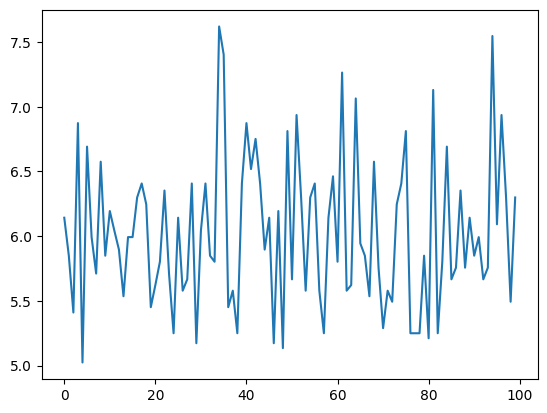

In [52]:
plt.plot(win_ratio)

In [20]:
trajectories, payoffs = eval_env.run(is_training=False)
trajectories = reorganize(trajectories, payoffs)

In [28]:
eval_env.get_perfect_information()

{'chips': [28, 28, 28],
 'public_card': ['D8', 'CK', 'D5', 'S9', 'H3'],
 'hand_cards': [['SQ', 'S4'], ['H7', 'C5'], ['S2', 'SJ']],
 'current_player': 1,
 'legal_actions': ['raise', 'fold', 'check']}